<a href="https://colab.research.google.com/github/itz-abhay/VAE-Generating-Images-/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1/1 [==============================] - 0s 244ms/step


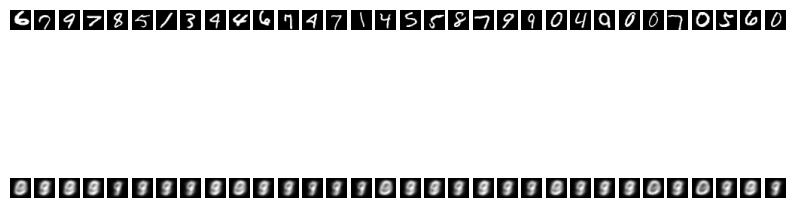

Epoch 2/10
1/1 [==============================] - 0s 17ms/step


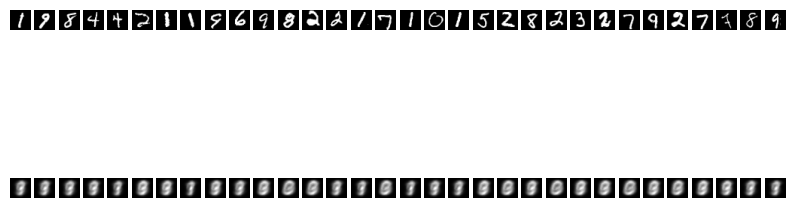

Epoch 3/10
1/1 [==============================] - 0s 15ms/step


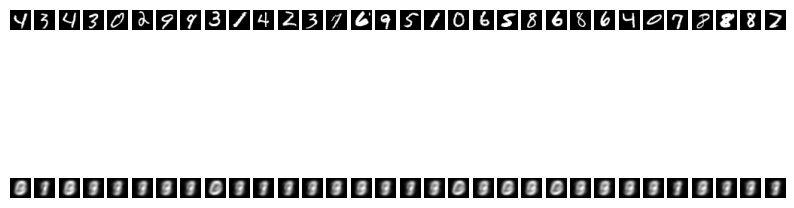

Epoch 4/10
1/1 [==============================] - 0s 23ms/step


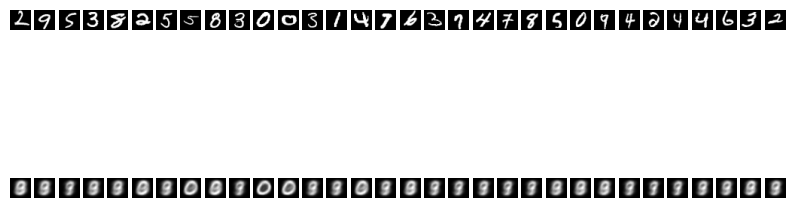

Epoch 5/10
1/1 [==============================] - 0s 17ms/step


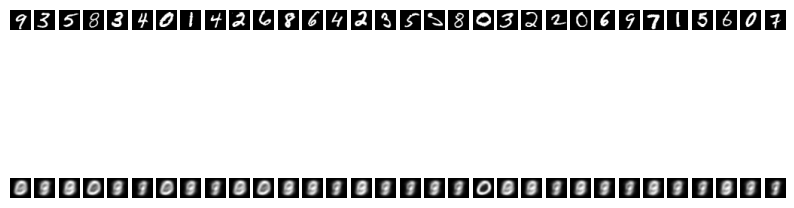

Epoch 6/10
1/1 [==============================] - 0s 16ms/step


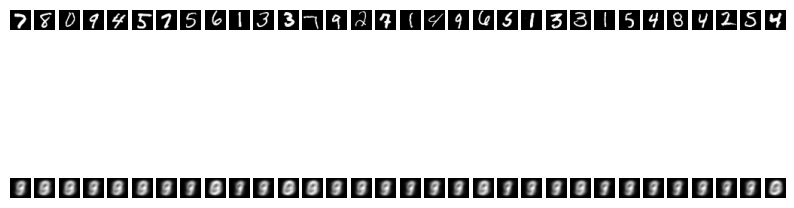

Epoch 7/10
1/1 [==============================] - 0s 16ms/step


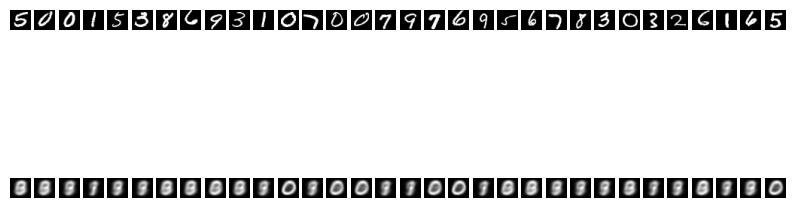

Epoch 8/10
1/1 [==============================] - 0s 16ms/step


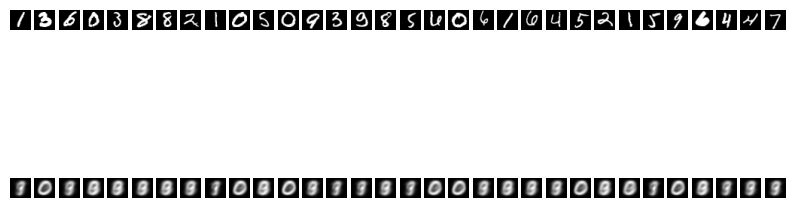

Epoch 9/10
1/1 [==============================] - 0s 31ms/step


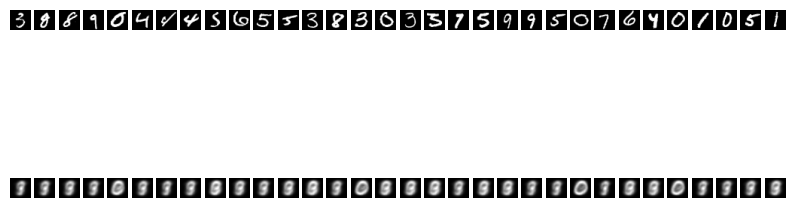

Epoch 10/10
1/1 [==============================] - 0s 16ms/step


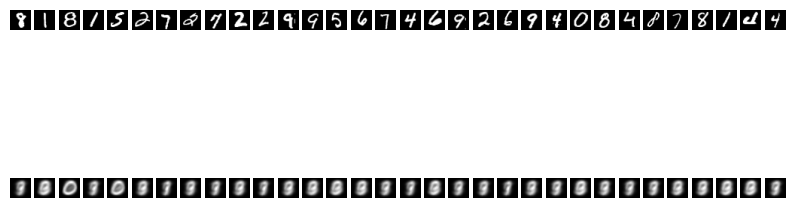

In [ ]:

# !pip install tensorflow
# !pip install matplotlib

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

latent_dim = 2  # Dimensionality of the latent space

input_img = tf.keras.Input(shape=(784,))
encoder_h = layers.Dense(256, activation='relu')(input_img)
z_mean = layers.Dense(latent_dim)(encoder_h)
z_log_var = layers.Dense(latent_dim)(encoder_h)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

decoder_h = layers.Dense(256, activation='relu')
decoder_mean = layers.Dense(784, activation='sigmoid')

h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

vae = models.Model(input_img, x_decoded_mean)

xent_loss = tf.keras.backend.sum(tf.keras.losses.binary_crossentropy(input_img, x_decoded_mean), axis=-1)
kl_loss = -0.5 * tf.keras.backend.sum(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
vae_loss = tf.keras.backend.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

epochs = 10
batch_size = 32

for epoch in range(epochs):
    print("Epoch {}/{}".format(epoch + 1, epochs))

    history = vae.fit(x_train, epochs=1, batch_size=batch_size, validation_data=(x_test, None), verbose=0)

    if epoch % 1 == 0:
        idx = np.random.randint(0, x_test.shape[0], batch_size)
        x_sample = x_test[idx]

        x_reconstructed = vae.predict(x_sample)

        x_sample = x_sample.reshape((batch_size, 28, 28))
        x_reconstructed = x_reconstructed.reshape((batch_size, 28, 28))

        plt.figure(figsize=(10, 4))
        for i in range(batch_size):
            plt.subplot(2, batch_size, i + 1)
            plt.imshow(x_sample[i], cmap='gray')
            plt.axis('off')

            plt.subplot(2, batch_size, i + 1 + batch_size)
            plt.imshow(x_reconstructed[i], cmap='gray')
            plt.axis('off')

        plt.show()
